In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("data/Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
X = df[['open', 'high', 'low', 'close', 'volume']]

In [4]:
X = X.dropna()


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
inertia = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

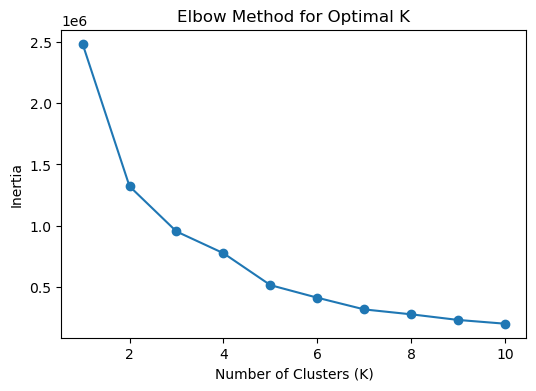

In [7]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)


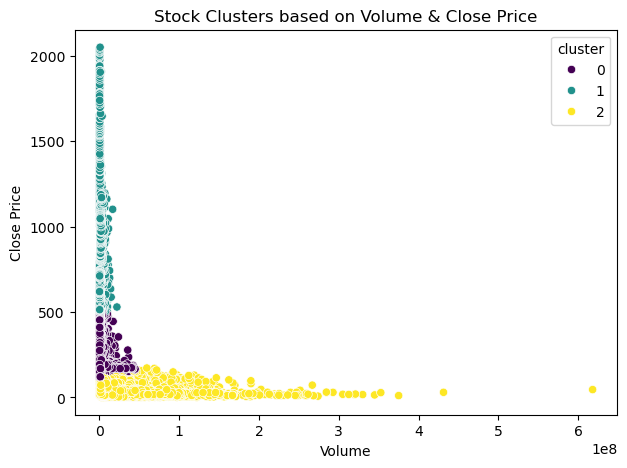

In [11]:
# =========================================
# Step 8: Visualize Clusters (2D Scatter Plot)
# =========================================

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df_cluster['volume'],
    y=df_cluster['close'],
    hue=df_cluster['cluster'],
    palette='viridis'
)
plt.title("Stock Clusters based on Volume & Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()


In [12]:
cluster_summary = df_cluster.groupby('cluster')[['open', 'high', 'low', 'close', 'volume']].mean()
cluster_summary
abs

<function abs(x, /)>

In [13]:
df['cluster'] = np.nan
df.loc[df_cluster.index, 'cluster'] = df_cluster['cluster']

df[['open', 'close', 'volume', 'cluster']].head()

,open,close,volume,cluster
0,25.0700,25.3600,8998943,2.0
1,79.3828,79.0185,58791957,2.0
2,110.3600,109.7400,542711,2.0
3,52.1200,51.9800,4569061,2.0
4,70.1100,69.8900,1148391,2.0
